# Ethr

Load in server log files from ethr tests

In [18]:
import pandas as pd

c_server = pd.read_json("c-server.log")
rust_server = pd.read_json("rust-server.log")

## Sanitize
Results may be in either gigabit or megabit format

In [19]:
def to_gbit(x: str) -> float:
    if(x.endswith('G')):
        return float(x.partition('G')[0])
    
    if(x.endswith('M')):
        return float(x.partition('M')[0]) / 1000

    return 0


c_server.BitsPerSecond = c_server.BitsPerSecond.map(to_gbit)
rust_server.BitsPerSecond = rust_server.BitsPerSecond.map(to_gbit)

## Results

Throughput
```
Rust: 3.84 GB
C: 3.9 GB
```

In [20]:
[
    ("Rust:", round(rust_server.BitsPerSecond.mean() / 8, 2)),
    ("C:", round(c_server.BitsPerSecond.mean() / 8, 2))
]


[('Rust:', 3.84), ('C:', 3.9)]

<AxesSubplot:>

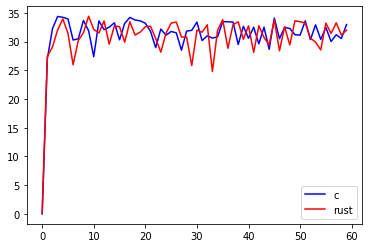

In [48]:
languages = pd.DataFrame(
    index=list(range(0, len(c_server.BitsPerSecond.index) - 1)),
    data={
        "c": c_server.BitsPerSecond,
        "rust": rust_server.BitsPerSecond
    }
)

languages.plot.line(
    subplots=False,
    color={"rust": "red", "c": "blue"}
)